In [ ]:
import csv
import pandas as pd

In [25]:
#Reading the data and printing first 5 lines
with open('solarPower_50m.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        print(row)
        if i == 4: 
            break

['', 'precip', 'cloud cover', 'solar radiation', 'humidity', 'pressure', 'UV index', 'temp min', 'temp max', 'solar energy', 'PV output']
['2019-12-01', '0.0', '72.0', '27.9', '87.3', '1024.4', '2.0', '0.9', '5.4', '2.4', '0.748']
['2019-12-02', '0.12', '41.2', '', '82.0', '1032.6', '2.0', '-1.1', '5.8', '3.9', '1.1219999999999999']
['2019-12-03', '0.0', '59.8', '42.5', '82.6', '1027.7', '3.0', '2.1', '8.2', '3.7', '1.091']
['2019-12-04', '0.096', '26.2', '43.8', '90.6', '1020.7', '3.0', '1.0', '6.9', '3.7', '1.06']


In [40]:
df = pd.read_csv('solarPower_50m.csv')
df

,Unnamed: 0,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
1,2019-12-02,0.120,41.2,NaN,82.0,1032.6,2.0,-1.1,5.8,3.9,1.122
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712
...,...,...,...,...,...,...,...,...,...,...,...
788,2022-01-27,0.605,64.0,23.6,91.7,1030.8,1.0,2.0,10.4,2.1,0.612
789,2022-01-28,0.191,61.8,40.8,95.9,1035.6,2.0,0.6,9.1,3.5,0.401
790,2022-01-29,1.226,77.8,31.0,93.5,1031.9,1.0,3.5,10.2,2.6,0.700
791,2022-01-30,0.124,38.8,53.9,88.9,1031.4,3.0,0.4,8.0,4.7,1.313


In [7]:
#Checking for null values across the whole dataset and then making the changes accordingly
df.isna().sum()

Unnamed: 0          0
precip              0
cloud cover         0
solar radiation    33
humidity            0
pressure            1
UV index            0
temp min            0
temp max            0
solar energy        0
PV output           0
dtype: int64

In [11]:
raditaion_info = df['solar radiation'].describe()
print(raditaion_info)

count    760.000000
mean     108.408684
std       84.538525
min        7.200000
25%       32.450000
50%       88.400000
75%      165.550000
max      319.700000
Name: solar radiation, dtype: float64


In [41]:
#Replacing Null values with median in solar radiation column instead of mean as the standard deviation is high
df['solar radiation'].fillna(df['solar radiation'].median(), inplace=True) 

In [20]:
#Checking the data distribution after making the changes
#This is to make sure that the changes are not adversley affecting the data distribution as whole
updated_raditaion_info = df['solar radiation'].describe()
print(raditaion_info)

count    793.000000
mean     107.576040
std       82.855099
min        7.200000
25%       33.300000
50%       88.400000
75%      161.600000
max      319.700000
Name: solar radiation, dtype: float64


In [12]:
pressure_info=df['pressure'].describe()
print(pressure_info)

count     792.000000
mean     1015.693939
std        11.456059
min       975.100000
25%      1008.300000
50%      1016.750000
75%      1023.700000
max      1048.400000
Name: pressure, dtype: float64


In [42]:
#Replacing the null values by mean as the standard deviation is relatively low in this case
df['pressure'].fillna(df['pressure'].mean(), inplace=True) 

In [44]:
#Reconfirming and Checking for null values across the whole dataset
df.isna().sum()

Unnamed: 0         0
precip             0
cloud cover        0
solar radiation    0
humidity           0
pressure           0
UV index           0
temp min           0
temp max           0
solar energy       0
PV output          0
dtype: int64

In [43]:
#Visualizing the cleaned data
df.describe()

,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2.652846,66.108701,107.576040,83.719420,1015.693939,4.050441,7.019546,13.164817,9.262169,2.804861
std,4.604500,20.495106,82.855099,9.526572,11.448824,2.471040,4.598832,5.340954,7.247400,2.044960
min,0.000000,0.000000,7.200000,47.700000,975.100000,0.000000,-3.900000,-0.100000,0.700000,0.078000
25%,0.024000,53.400000,33.300000,78.500000,1008.300000,2.000000,3.400000,9.400000,2.800000,0.855000
50%,0.506000,68.200000,88.400000,85.400000,1016.700000,4.000000,7.200000,12.200000,7.400000,2.462000
75%,3.340000,82.200000,161.600000,91.000000,1023.700000,6.000000,10.700000,17.300000,14.100000,4.566000
max,36.276000,100.000000,319.700000,98.900000,1048.400000,10.000000,18.300000,29.700000,27.700000,6.873000


In [29]:
#Visualizing the cleaned data and checking for any stong correlation
correlation_matrix = df.corr()
correlation_matrix

,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
precip,1.000000,0.223962,-0.284168,0.354974,-0.541707,-0.254149,0.088182,-0.100151,-0.280097,-0.269691
cloud cover,0.223962,1.000000,-0.572264,0.676203,-0.152143,-0.561257,0.135861,-0.255198,-0.579853,-0.464403
solar radiation,-0.284168,-0.572264,1.000000,-0.730207,0.202686,0.930310,0.349238,0.688651,0.988448,0.919065
humidity,0.354974,0.676203,-0.730207,1.000000,-0.257123,-0.686264,0.016645,-0.354506,-0.740600,-0.675929
pressure,-0.541707,-0.152143,0.202686,-0.257123,1.000000,0.179333,-0.097728,0.097871,0.205886,0.218124
UV index,-0.254149,-0.561257,0.930310,-0.686264,0.179333,1.000000,0.317739,0.643975,0.943173,0.884687
temp min,0.088182,0.135861,0.349238,0.016645,-0.097728,0.317739,1.000000,0.836889,0.350692,0.441147
temp max,-0.100151,-0.255198,0.688651,-0.354506,0.097871,0.643975,0.836889,1.000000,0.697229,0.722166
solar energy,-0.280097,-0.579853,0.988448,-0.740600,0.205886,0.943173,0.350692,0.697229,1.000000,0.930760
PV output,-0.269691,-0.464403,0.919065,-0.675929,0.218124,0.884687,0.441147,0.722166,0.930760,1.000000


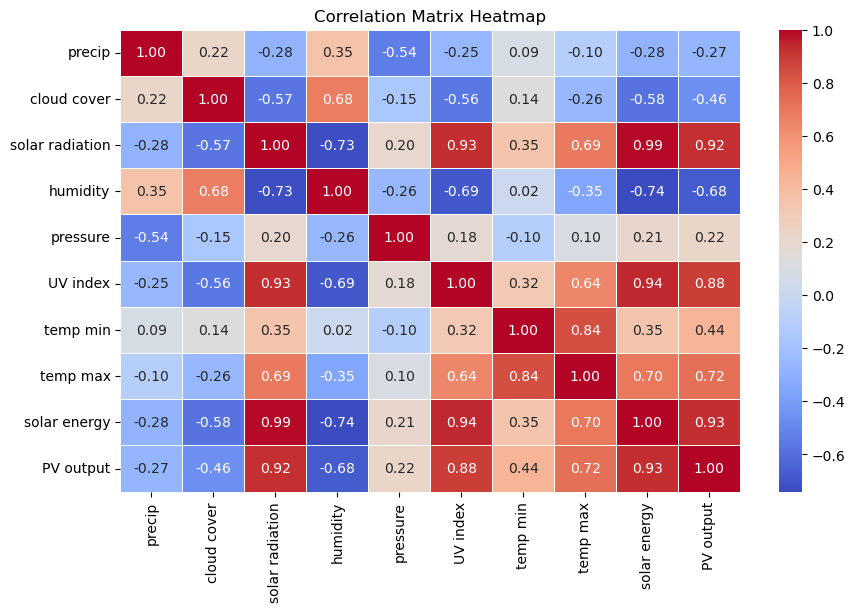

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [123]:
# Load Data
df = pd.read_csv("solarPower_50m.csv")

#Cleaning Data
df['pressure'].fillna(df['pressure'].mean(), inplace=True) 
df['solar radiation'].fillna(df['solar radiation'].median(), inplace=True) 

## Data Preprocessing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
X = df.drop(columns=['PV output'])
y = df['PV output']

In [125]:
# Convert date column to datetime
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

In [126]:
#Feature Engineering
# Create Lag Features
df['PV_output_lag1'] = df['PV output'].shift(1)  # Yesterday's PV output
df['PV_output_lag7'] = df['PV output'].shift(7)  # PV output 7 days ago
# Rolling Window Features
df['PV_output_rolling7'] = df['PV output'].rolling(window=7).mean()

In [127]:
# Drop NaN values created by shifting
df.dropna(inplace=True)

# Drop date column (not used for training)
df.drop(columns=[df.columns[0]], inplace=True)

In [128]:
# Split into training (first 24 months) and testing (last 2 months)
train_size = int((24/26) * len(df))
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Split into features (X) and target (y)
X_train, y_train = train_df.drop(columns=['PV output']), train_df['PV output']
X_test, y_test = test_df.drop(columns=['PV output']), test_df['PV output']

## Training the Model

Since this is a regression problem we will try some regression technique

Trying the XGBoost Model

In [109]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [129]:
# Initialize XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.174068179183319
R² Score: 0.6550554883358821


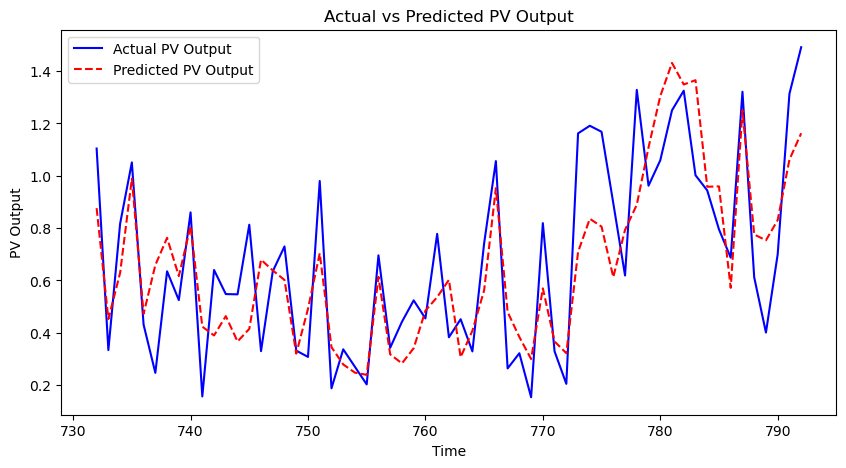

In [122]:
#Visualizing predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual PV Output", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted PV Output", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("PV Output")
plt.legend()
plt.title("Actual vs Predicted PV Output")
plt.show()
